#`Why do EDA`
- Model building

- Analysis and reporting

- Validate assumptions

- Handling missing values

- feature engineering

- detecting outliers

# Remember it is an iterative process
    

In [3]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [57]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [58]:
## load data
df=pd.read_csv('/content/gurgaon_properties_cleaned_v2_.csv')
df.head()

,Unnamed: 0,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
0,0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.000000,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1.0,4.0,West,Relatively New Property,NaN,NaN,900.0,0,0,0,0,0,1,28.0
1,1,flat,apna enclave,sector 3,0.50,7692.0,650.026001,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1.0,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,1,37.0
2,2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.060994,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3.0,12.0,NaN,New Property,NaN,NaN,595.0,0,0,0,0,0,0,36.0
3,3,flat,smart world orchard,sector 61,1.47,12250.0,1200.000000,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2.0,2.0,NaN,undefined,NaN,NaN,1200.0,1,0,0,0,0,0,76.0
4,4,flat,parkwood westend,sector 92,0.70,5204.0,1345.119139,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3.0,5.0,NaN,Under Construction,1345.0,NaN,NaN,1,0,0,0,0,0,0.0


In [59]:
df=df.drop('Unnamed: 0',axis=1)

In [60]:
## shape of dataset
df.shape

(3785, 23)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        3785 non-null   object 
 1   society              3304 non-null   object 
 2   sector               3785 non-null   object 
 3   price                3785 non-null   float64
 4   Price_per_sqrt       3785 non-null   float64
 5   Area                 3785 non-null   float64
 6   areaWithType         3785 non-null   object 
 7   bedRoom              3785 non-null   float64
 8   bathroom             3785 non-null   float64
 9   balcony              3785 non-null   float64
 10  floorNum             3766 non-null   float64
 11  facing               2686 non-null   object 
 12  agePossession        3785 non-null   object 
 13  Super_Built_up_area  1915 non-null   float64
 14  Built_Up_area        1716 non-null   float64
 15  Carpet area          1941 non-null   f

In [62]:
df.describe()

,price,Price_per_sqrt,Area,bedRoom,bathroom,balcony,floorNum,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
count,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3766.000000,1915.000000,1716.000000,1941.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3785.000000,3730.000000
mean,2.505831,13800.167768,2846.147913,3.326024,3.393131,2.408190,6.825810,1921.658251,1890.496131,2486.675806,0.188375,0.355878,0.089828,0.173580,0.110436,0.658653,71.131635
std,2.950103,23052.005585,22783.344103,1.859329,1.910596,0.859954,6.036844,767.160169,17807.808614,22392.383354,0.391063,0.478842,0.285973,0.378798,0.313474,0.529015,52.829234
min,0.080000,4.000000,50.000000,1.000000,1.000000,0.000000,-1.000000,89.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.940000,6808.000000,1219.512195,2.000000,2.000000,2.000000,2.000000,1457.000000,450.000000,830.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,1.500000,9000.000000,1725.187741,3.000000,3.000000,3.000000,5.000000,1828.000000,1305.000000,1295.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.500000
75%,2.700000,13765.000000,2295.062673,4.000000,4.000000,3.000000,10.000000,2215.000000,1900.000000,1790.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,109.000000
max,31.500000,600000.000000,875000.000000,21.000000,21.000000,3.000000,51.000000,10000.000000,737147.000000,607936.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


In [63]:
# df[df['Area']==875000.000000]
df.loc[2407,['Area','Built_Up_area']]=737.147

In [64]:
df.duplicated().sum()

81

In [65]:
df=df.drop_duplicates()

In [66]:
df.shape

(3704, 23)

In [67]:
df.select_dtypes('number').columns

Index(['price', 'Price_per_sqrt', 'Area', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'Super_Built_up_area', 'Built_Up_area', 'Carpet area',
       'Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others',
       'furnish_type', 'luxury_score'],
      dtype='object')

In [68]:
df.select_dtypes('object').columns

Index(['Property_type', 'society', 'sector', 'areaWithType', 'facing',
       'agePossession'],
      dtype='object')

#`Column Types`

- Numerical - 'price', 'Price_per_sqrt', 'Area', 'bedRoom', 'bathroom', 'balcony','floorNum', 'Super_Built_up_area', 'Built_Up_area', 'Carpet area','Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others',
'furnish_type', 'luxury_score'.

- Categorical -
    'Property_type', 'society', 'sector', 'facing','agePossession'

#`Univariate Analysis`

Univariate analysis focuses on analyzing each feature in the dataset independently.

Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- Normal Distribution: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- Skewed Distribution: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- Bimodal Distribution: A distribution with two peaks or modes.

- Uniform Distribution: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data. There are several measures of dispersion, including:

- Range: The difference between the largest and smallest values in a data set.

- Variance: The average of the squared deviations of each value from the mean of the data set.

- Standard Deviation: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- Interquartile range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

Steps of doing Univariate Analysis on Numerical columns

- Descriptive Statistics: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- Visualizations: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

Identifying Outliers: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- Skewness: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.**

##`Steps of doing Univariate Analysis on Categorical columns`
Descriptive Statistics: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

Visualizations: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

Missing Values: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


In [69]:
##Property_type
df['Property_type'].value_counts().values

array([2861,  843])

In [70]:
fig = px.bar(
    x=df['Property_type'].value_counts().index,
    y=df['Property_type'].value_counts().values,
    color=df['Property_type'].value_counts().index,
    text_auto=True,
    labels={'x': 'Property Type', 'y': 'Count'},  # Custom axis labels
    title="Property Type Distribution"  # Add a title
)

# Further customization
fig.update_traces(
    textposition='outside',  # Place text values outside the bars
    marker=dict(line=dict(color='black', width=1))  # Add borders to bars
)

fig.update_layout(
    xaxis_title="Property Type",  # X-axis title
    yaxis_title="Count",  # Y-axis title
    title=dict(font=dict(size=20)),  # Customize title font size
    legend_title="Property Type",  # Legend title
    template="plotly_white",  # Use a clean background
    xaxis=dict(tickangle=45)  # Rotate x-axis labels
)

# Show the plot
fig.show()

In [71]:
# Customized pie chart
fig = px.pie(
    labels=df['Property_type'].value_counts().index,
    values=df['Property_type'].value_counts().values,
    names=df['Property_type'].value_counts().index,
    title="Distribution of Property Types",
    hole=0.3,  # To create a donut chart effect
    color_discrete_sequence=px.colors.qualitative.Set3  # Custom color palette
)

# Additional customization
fig.update_traces(
    textinfo="percent+label",  # Show percentage and labels
    pull=[0.1 ]  # Highlight the first slice
)

fig.update_layout(
    title_font_size=20,  # Customize title font size
    title_x=0.5,  # Center align the title
    legend_title="Property Types",  # Legend title
    legend=dict(orientation="h", x=0.5, xanchor="center", y=-0.1)  # Horizontal legend
)

# Show the plot
fig.show()

In [72]:
df['Property_type'].isna().sum()

0

## `conclusion`
- 77% flats and 23% houses
- no missing values

In [73]:
df['society']=df['society'].fillna('Independent')

In [74]:
## society
df['society'].value_counts(dropna=False).head(50)

,count
society,
Independent,481
tulip violet,75
ss the leaf,74
shapoorji pallonji joyville gurugram,43
dlf new town heights,37
signature global park,35
shree vardhman victoria,34
smart world orchard,32
emaar mgf emerald floors premier,32


In [75]:
# df[(df['society']=='Independent') & (df['Property_type']=='flat')].head()

In [76]:
# Drop the row with index 2710
df = df.drop(index=2710)

In [77]:
df[df['society']!='Independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023270
ss the leaf,0.046230
shapoorji pallonji joyville gurugram,0.059572
dlf new town heights,0.071052
signature global park,0.081911
shree vardhman victoria,0.092460
smart world orchard,0.102389
emaar mgf emerald floors premier,0.112318
paras dews,0.121936


In [78]:
scociety_count=df['society'].value_counts()
frequency_bins={'very_high(>100)' : (scociety_count>100).sum(),'high(50-100)' : (((scociety_count>=50) & (scociety_count<=100)).sum()),
                'Average(10-49)' : (((scociety_count>=10) & (scociety_count<49)).sum()),
                'low(2-10)' : (((scociety_count>=2) & (scociety_count<10)).sum()),
                'very_low(1)' : (scociety_count==1).sum()}

In [79]:
frequency_bins

{'very_high(>100)': 1,
 'high(50-100)': 2,
 'Average(10-49)': 92,
 'low(2-10)': 278,
 'very_low(1)': 300}

<Axes: xlabel='society'>

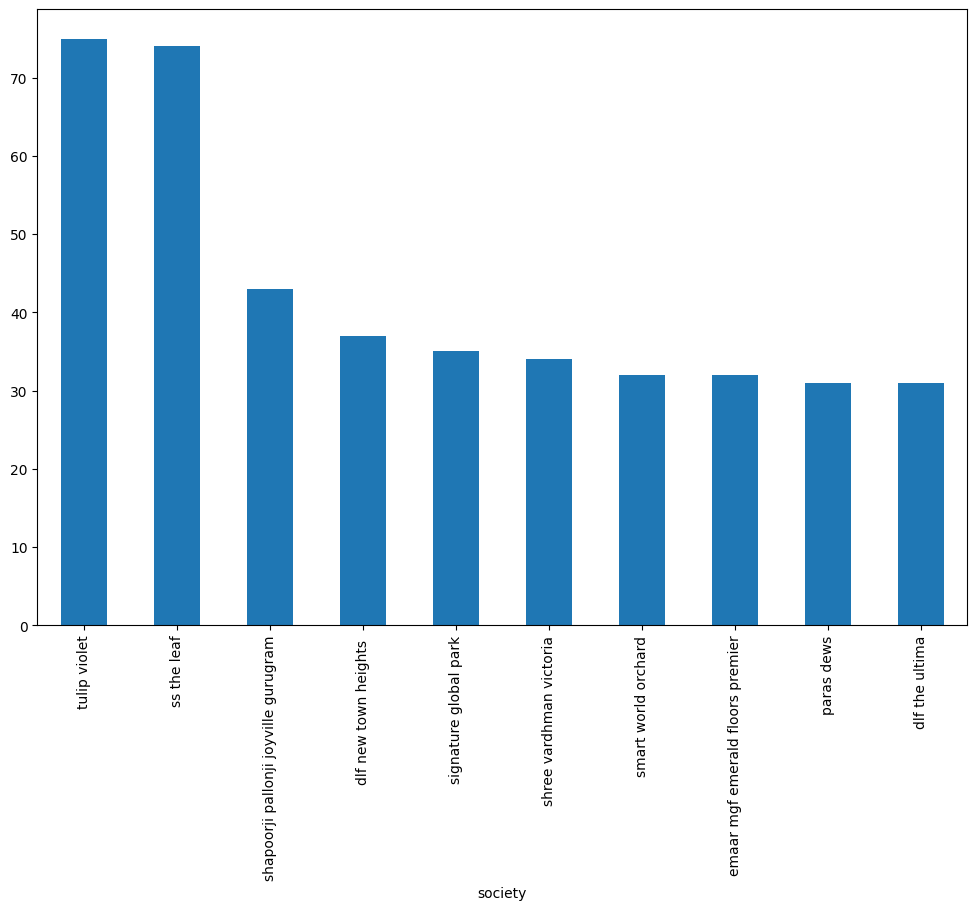

In [80]:
## top 10 society
plt.figure(figsize=(12,8))
df[df['society']!='Independent']['society'].value_counts().head(10).plot(kind='bar')

In [81]:
(df[df['society']=='Independent'].shape[0]/df.shape[0])*100

12.96246286794491

## `conclusion on society columns`
- 13% properties are comes under independent tag.
- there are 673 society.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies.

- Very High (>100): Only 1 society has more than 100 listings.

- High (50-100): 2 societies have between 50 to 100 listings.

- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.

- Low (2-9): 278 societies have between 2 to 9 listings.

- Very Low (1): A significant number, 300 societies, have only 1 list.

In [82]:
## sector
df['sector'].value_counts(dropna=False).shape

(113,)

In [83]:
df['sector'].value_counts(dropna=False)

,count
sector,
sohna road,156
sector 102,109
sector 85,109
sector 92,101
sector 69,93
sector 90,91
sector 81,89
sector 65,87
sector 109,86


<Axes: xlabel='sector'>

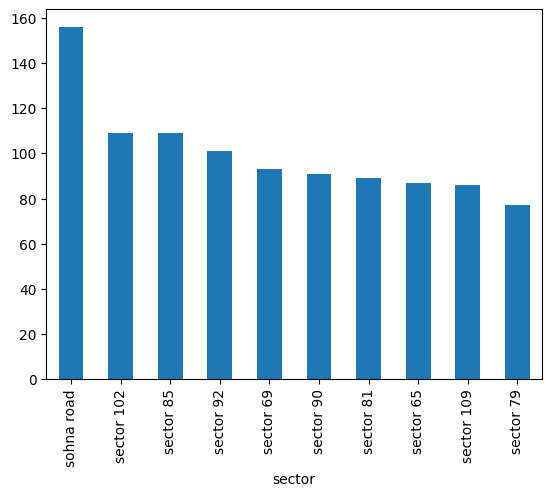

In [84]:
## top 10 sector in gurgaan
df['sector'].value_counts(dropna=False).head(10).plot(kind='bar')

In [85]:
# Calculate the frequency of each sector
sector_count = df['sector'].value_counts()

# Define frequency bins based on the counts
frequency_bins = {
    'very_high(>100)': (sector_count > 100).sum(),
    'high(50-100)': ((sector_count >= 50) & (sector_count <= 100)).sum(),
    'Average(10-49)': ((sector_count >= 10) & (sector_count < 49)).sum(),
    'low(2-10)': ((sector_count >= 2) & (sector_count < 10)).sum(),
    'very_low(1)': (sector_count == 1).sum()
}

# Output the frequency bins
frequency_bins

{'very_high(>100)': 4,
 'high(50-100)': 25,
 'Average(10-49)': 62,
 'low(2-10)': 21,
 'very_low(1)': 1}

#`Observations`

- There are a total of 104 unique sectors in the dataset.

- Frequency distribution of sectors:

- Very High (>100): 4 sectors have more than 100 listings.
- High (50-100): 25 sectors have between 50 to 100 listings.
Average (10-49): A majority, 62 sectors, fall in this range with 10 to 49 listings each.
Low (2-10): 21 sectors have between 2 to 9 listings.
Very Low (1): Interestingly, there is only 1 sectors with only 1 listing.


In [86]:
## price (our output column)
df['price'].describe()

,price
count,3703.000000
mean,2.522746
std,2.968753
min,0.080000
25%,0.940000
50%,1.510000
75%,2.750000
max,31.500000


In [87]:

# Customize the histogram using Plotly Express
fig = px.histogram(
    df,
    x='price',
    nbins=50,  # Number of bins
    title='Distribution of Prices',
    labels={'price': 'Price'},  # Label for the x-axis
    color_discrete_sequence=['skyblue']  # Bar color
)

# Additional customizations
fig.update_layout(
    xaxis_title='Price',  # X-axis label
    yaxis_title='Frequency',  # Y-axis label
    title_font_size=16,  # Title font size
    xaxis=dict(
        tickfont=dict(size=12),  # Customize x-axis tick font size
        range=[0,20]  # Set x-axis limits
    ),
    yaxis=dict(
        tickfont=dict(size=12)  # Customize y-axis tick font size
    ),
    bargap=0.1,  # Gap between bars
    template='plotly_white',  # Use a clean template
)

# Show the plot
fig.show()


<Axes: xlabel='price', ylabel='Density'>

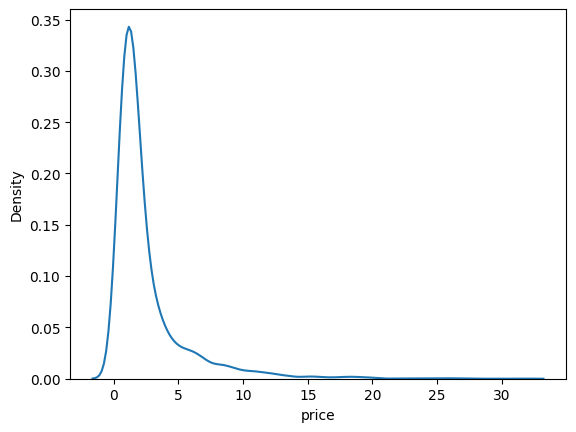

In [88]:
sns.kdeplot(df['price'])

In [89]:
df['price'].skew()

3.290222329016854

<Axes: xlabel='price'>

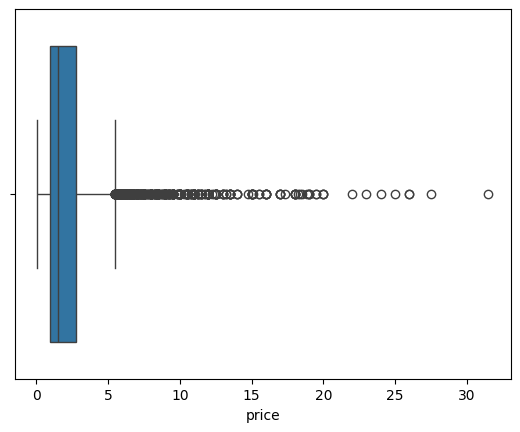

In [90]:
sns.boxplot(df,x='price')

In [91]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print(df[(df["price"] < lower_bound) | (df["price"] > upper_bound)].shape)
print(upper_bound)
print(lower_bound)

(426, 23)
5.465
-1.775


In [92]:
## outliers data analysis
df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]['price'].describe()

,price
count,426.000000
mean,9.227653
std,4.063785
min,5.490000
25%,6.445000
50%,8.000000
75%,10.702500
max,31.500000


#`outliers data analysis`

- `there 426 property that considered to be outlier`

- `outliers have mean of 9 cr`

- `range of outliers 5.490000 to 31.5`

In [93]:
## price
df['price'].isna().sum()

0

In [94]:
df['price'].kurt()

15.060187083050058

<Axes: xlabel='price'>

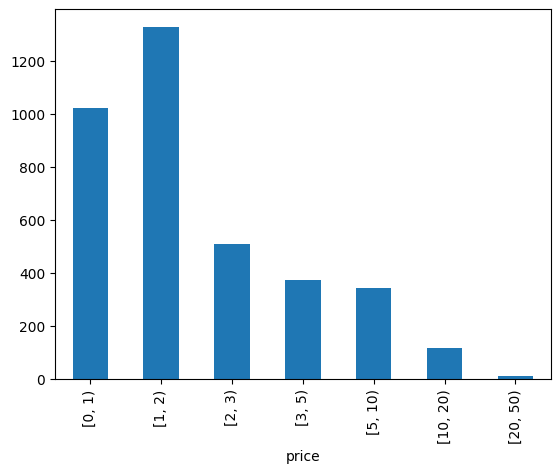

In [95]:
# Custom bin edges
bins = [0,1, 2, 3, 5, 10, 20, 50]
pd.cut(df['price'],bins=bins, right=False).value_counts().sort_index().plot(kind='bar')

In [96]:
## ecdf plot
ecdf=df['price'].value_counts().sort_index().cumsum()/len(df['price'])
px.scatter(x=ecdf.index,y=ecdf.values)

In [97]:
# Histogram for price values
fig1 = px.histogram(df, x='price', nbins=50, labels={'price': 'Price'},title=('Original'))
fig1.show()

# Histogram for log-transformed price values
fig2 = px.histogram(df, x=np.log1p(df['price']), nbins=50, labels={'x': 'Log(Price)'},title=('After log transformation'))
fig2.show()

In [98]:
# Histogram for price values
fig1 = px.box(df, x='price', labels={'price': 'Price'},title=('Original'))
fig1.show()

# Histogram for log-transformed price values
fig2 = px.box(df, x=np.log1p(df['price']), labels={'x': 'Log(Price)'},title=('After log transformation'))
fig2.show()

# `Descriptive Statistics:`

Count: There are 3,660 non-missing price entries.

Mean Price: The average price is approximately 2.52 crores.

Median Price: The median (or 50th percentile) price is 1.51 crores.

Standard Deviation: The prices have a standard deviation of 2.96, indicating variability in the prices.

Range: Prices range from a minimum of 0.08 crores to a maximum of 31.5 crores.

IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.94 crores to 2.75 crores.

Visualizations:

Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

###`Missing Values: There are no missing values in the price column.`

### Skewness: The price distribution has a skewness of approximately `3.29`, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

### Kurtosis: The kurtosis value is approximately `15.060187083050058`. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

##`majority of data in price column lies in 0-1,1-2 crore range`
##`significant drop in price column after 5cr`

In [99]:
df['Price_per_sqrt'].isna().sum()

0

In [100]:
## price_per_sqft
df['Price_per_sqrt'].describe()

,Price_per_sqrt
count,3703.000000
mean,13846.170132
std,23087.859111
min,4.000000
25%,6812.500000
50%,9007.000000
75%,13858.000000
max,600000.000000


<Axes: xlabel='Price_per_sqrt', ylabel='Count'>

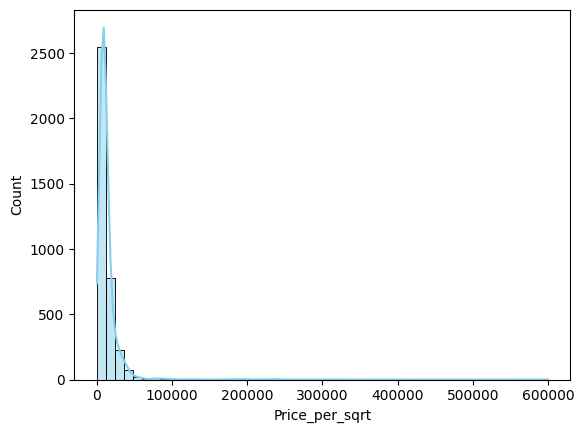

In [101]:
sns.histplot(df['Price_per_sqrt'],kde=True, color='skyblue',bins=50)

In [102]:
# Histogram for price values
fig1 = px.box(df, x='Price_per_sqrt', labels={'price': 'Price'},title=('Original'))
fig1.show()

#`Price_per_sqft`
- `there are potencial outliers in this column`
- `There are no missing values`
- `data is rightly-skewed(majority of the values are to the left)`

In [103]:
## bedroom
df['bedRoom'].isna().sum()

0

In [104]:
px.bar(x=df['bedRoom'].value_counts().sort_index().index,y=df['bedRoom'].value_counts().sort_index().values,text_auto=True)

<Axes: ylabel='proportion'>

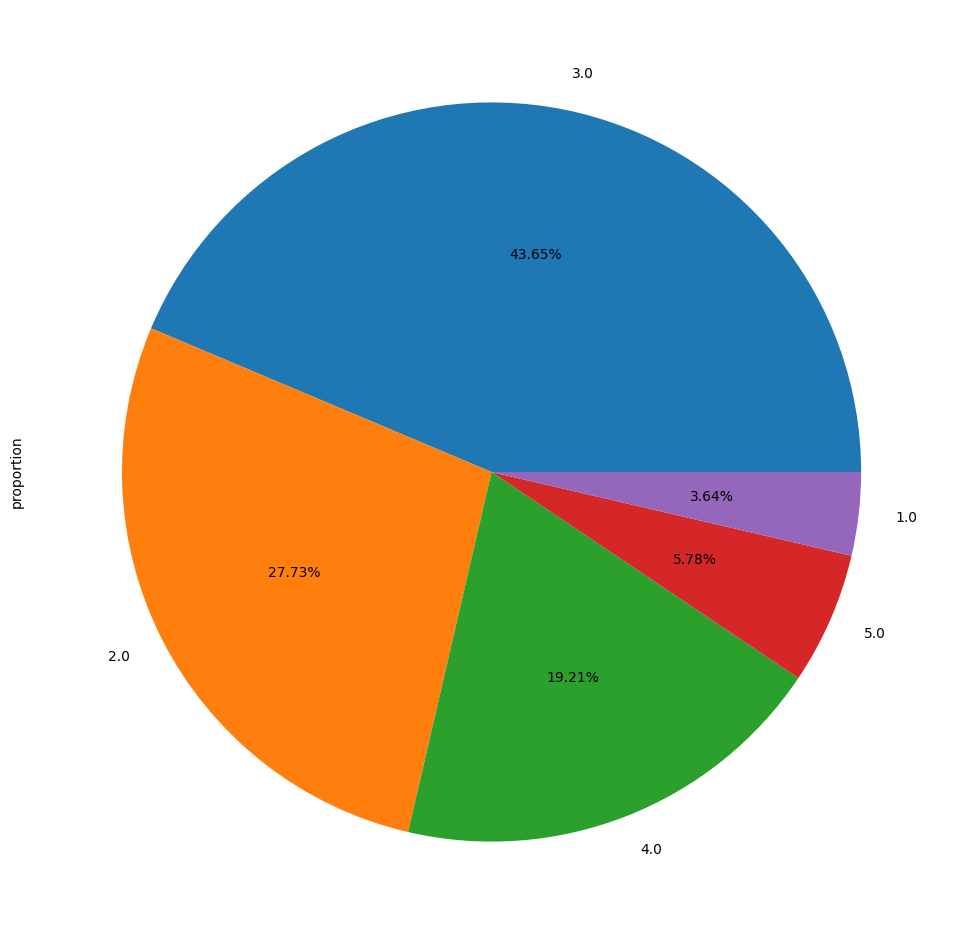

In [105]:
plt.figure(figsize=(12,12))
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

## `bedroom conclusion`
- there are 66% property that have 2 or 3 bedrooms.
- there is no missing value in bedroom data.

In [106]:
## bathroom
df['bathroom'].describe()

,bathroom
count,3703.000000
mean,3.404807
std,1.922470
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,21.000000


In [107]:
fig=px.pie(names=df['bathroom'].value_counts(normalize=True).index,values=df['bathroom'].value_counts(normalize=True).values)
fig.show()

In [108]:
px.bar(x=df['bathroom'].value_counts().sort_index().index,y=df['bathroom'].value_counts().sort_index().values,text_auto=True)

In [109]:
df['bathroom'].isna().sum()

0

##`bathroom`
- there are 80% property that have 2,3 or 4 bathroom.
- there is no missing value in bathroom data.

In [111]:
## balcony
df1=pd.read_csv('/content/gurgaon_clean_data_v2.csv')
df1.shape

(3803, 23)

In [112]:
# Extracting the index from df['balcony']
index = df['balcony'].index.tolist()

# Searching for those indices in df1
df['balcony']=df1.iloc[index]['balcony']

In [113]:
df.shape

(3703, 23)

In [114]:
## balcony
df['balcony'].value_counts()

,count
balcony,
3+,1161
3,1083
2,907
1,364
0,188


In [115]:
df['balcony'].describe()

,balcony
count,3703
unique,5
top,3+
freq,1161


In [116]:
fig=px.pie(names=df['balcony'].value_counts(normalize=True).index,values=df['balcony'].value_counts(normalize=True).values)
fig.show()

In [117]:
px.bar(x=df['balcony'].value_counts().sort_index().index,y=df['balcony'].value_counts().sort_index().values,text_auto=True)

In [118]:
df['balcony'].isna().sum()

0

##`balcony conclusion`
- nearly 60% property have 3 or more balcony
- there is no missing data

In [119]:
df['floorNum'].describe()

,floorNum
count,3685.000000
mean,6.816554
std,6.028119
min,-1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


In [120]:
### floornum
df['floorNum'].value_counts()

,count
floorNum,
3.0,498
2.0,492
1.0,352
4.0,314
8.0,195
6.0,184
10.0,181
7.0,179
5.0,175


<Axes: xlabel='floorNum', ylabel='Count'>

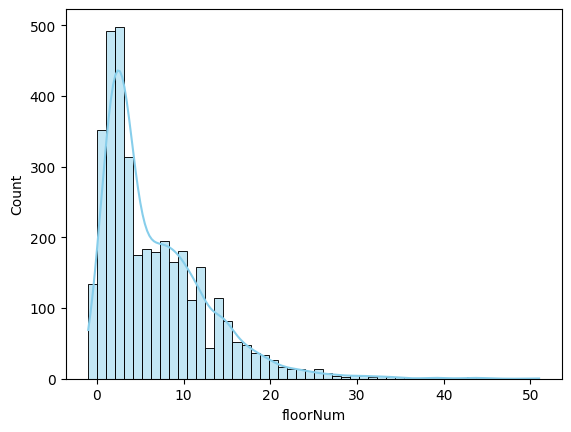

In [121]:
sns.histplot(df['floorNum'],kde=True,bins=50,color='skyblue')

In [122]:
df['floorNum'].skew()

1.6847102003995669

In [123]:
# boxplot
fig2 = px.box(df, df['floorNum'])
fig2.show()

In [124]:
## ecdf plot
ecdf=df['floorNum'].value_counts().sort_index().cumsum()/len(df['floorNum'])
px.scatter(x=ecdf.index,y=ecdf.values)

#`floorNum`

###The distribution is right-skewed (positively skewed), with most buildings having lower floor numbers and fewer buildings having higher floor numbers.

###The peak of the distribution occurs around floors 2-4, with the highest frequency appearing to be approximately 1100 buildings.

###There's a sharp decline after the peak, with significantly fewer buildings as the floor number increases.

###IQR lies btw 2nd and 10th floor

In [125]:
## facing
df['facing'].value_counts(dropna=False)

,count
facing,
NaN,1059
East,628
North-East,627
North,390
West,247
South,231
North-West,194
South-East,171
South-West,156


In [126]:
df[~((df['facing']=='East') |(df['facing']=='North-East'))]['price'].mean()

2.2950285947712414

In [127]:
df[(df['facing']=='East') |(df['facing']=='North-East')]['price'].mean()

2.9669322709163346

## `facing`
###`the property which have east or north east facing have avg. price 67 lakhs more then rest all other facing but there are 1059 missing values`

In [128]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'Price_per_sqrt', 'Area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'Super_Built_up_area', 'Built_Up_area', 'Carpet area',
       'Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others',
       'furnish_type', 'luxury_score'],
      dtype='object')

In [129]:
##agePossession
df['agePossession'].value_counts()

,count
agePossession,
Relatively New Property,1652
New Property,602
Moderately Old,561
undefined,456
Old Property,305
Under Construction,127


In [130]:
fig=px.pie(names=df['agePossession'].value_counts(normalize=True).index,values=df['agePossession'].value_counts(normalize=True).values)
fig.show()

In [131]:
px.bar(x=df['agePossession'].value_counts().sort_index().index,y=df['agePossession'].value_counts().sort_index().values,text_auto=True)

##`age possession`
###`there 60% property that are RelativelyNewProperty(1,5 year)(1652),New Property(0,1 year)(602)`


#`Areas`

In [132]:
df['Super_Built_up_area'].isna().sum()

1811

In [133]:
df['Super_Built_up_area'].describe()

,Super_Built_up_area
count,1892.000000
mean,1925.197437
std,767.473187
min,89.000000
25%,1471.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


In [134]:
df[df['Super_Built_up_area']<500]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
102,flat,godrej aria,sector 79,1.10,11482.0,958.021251,Super Built up area 89,2.0,2.0,3,9.0,NaN,New Property,89.0,NaN,NaN,0,0,0,0,0,0,28.0
130,flat,sushant lok,sector 43,2.50,12920.0,1934.984520,Super Built up area 215(179.77 sq.m.),3.0,3.0,3+,2.0,NaN,New Property,215.0,NaN,NaN,0,0,0,0,0,0,65.0
159,flat,rof ananda,sector 95,0.25,6578.0,380.054728,Super Built up area 380(35.3 sq.m.),1.0,1.0,3,4.0,NaN,New Property,380.0,NaN,NaN,0,0,0,0,0,0,44.0
421,flat,unitech greenwood city,sector 45,2.40,12346.0,1943.949457,Super Built up area 216(180.6 sq.m.),3.0,3.0,3+,1.0,North-West,New Property,216.0,NaN,NaN,0,1,0,0,0,1,49.0
1984,flat,godrej nature plus,sector 33,1.40,15124.0,925.681037,Super Built up area 145Carpet area: 86 sq.m.,3.0,2.0,2,20.0,NaN,New Property,145.0,NaN,86.00,0,0,0,0,0,0,31.0
2138,flat,signature global synera,sector 81,0.31,7434.0,417.002959,Super Built up area 417(38.74 sq.m.)Carpet area: 320 sq.ft. (29.73 sq.m.),1.0,1.0,3,13.0,North,Relatively New Property,417.0,NaN,320.00,0,0,0,0,0,1,69.0
2339,flat,pivotal devaan,sector 84,0.27,7964.0,339.025615,Super Built up area 439(40.78 sq.m.)Carpet area: 339 sq.ft. (31.49 sq.m.),1.0,1.0,3+,13.0,North-East,Relatively New Property,439.0,NaN,339.00,0,0,0,0,0,1,101.0
2368,flat,breez global heights,sohna road,0.25,7002.0,357.040845,Super Built up area 414(38.46 sq.m.)Carpet area: 357 sq.ft. (33.17 sq.m.),1.0,1.0,2,1.0,NaN,Relatively New Property,414.0,NaN,357.00,0,0,0,0,0,0,77.0
2767,flat,avl,sector 36a,0.36,8990.0,400.444939,Super Built up area 406(37.72 sq.m.)Carpet area: 402 sq.ft. (37.35 sq.m.),1.0,1.0,3,7.0,West,Relatively New Property,406.0,NaN,402.00,0,0,0,0,0,1,94.0
2782,flat,avl,sector 36a,0.37,10539.0,351.076952,Super Built up area 352(32.7 sq.m.),1.0,1.0,3,3.0,North,Relatively New Property,352.0,NaN,NaN,0,0,0,0,0,1,0.0


In [135]:
df.loc[1984,'Super_Built_up_area']=925.681037

In [136]:
df.loc[102,'Super_Built_up_area']=958.021251

<Axes: xlabel='Super_Built_up_area', ylabel='Count'>

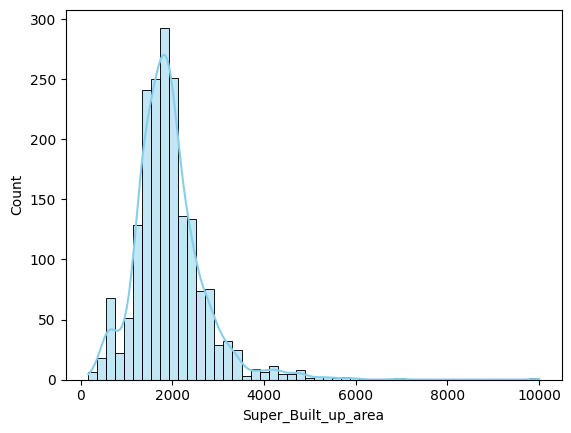

In [137]:
sns.histplot(df['Super_Built_up_area'],kde=True,color='skyblue',bins=50)

In [138]:
# boxplot
fig2 = px.box(df, df['Super_Built_up_area'])
fig2.show()

### Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
### There are a few properties with a significantly larger area, leading to a right-skewed distribution.
### The interquartile range (IQR) lies between roughly 1,471 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
### There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [139]:
## build_up_area
df['Built_Up_area'].isna().sum()

2018

<Axes: xlabel='Built_Up_area', ylabel='Count'>

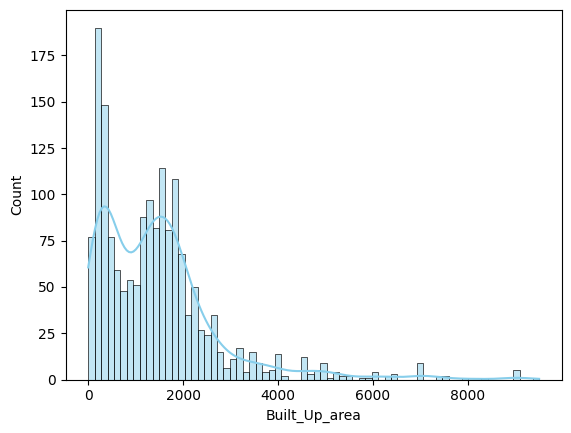

In [140]:
sns.histplot(df['Built_Up_area'],kde=True,bins=70,color='skyblue')

In [141]:
df['Built_Up_area'].describe()

,Built_Up_area
count,1685.000000
mean,1459.957571
std,1317.756010
min,2.000000
25%,425.000000
50%,1300.000000
75%,1900.000000
max,9500.000000


In [142]:
# boxplot
fig2 = px.box(df, df['Built_Up_area'])
fig2.show()

In [143]:
df[df['Built_Up_area']==2]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
3248,house,Independent,sector 50,5.0,232.0,215517.24,Plot area 2(1011.71 sq.m.),6.0,5.0,3,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,46.0


In [144]:
# df.loc[3248,'Built_Up_area']=10882

### Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
### There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
### The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.

In [145]:
df['Carpet area'].isna().sum()

1807

In [146]:
df['Carpet area'].describe()

,Carpet area
count,1896.000000
mean,2512.604098
std,22655.555353
min,15.000000
25%,836.490000
50%,1299.000000
75%,1786.250000
max,607936.000000


<Axes: xlabel='Carpet area', ylabel='Count'>

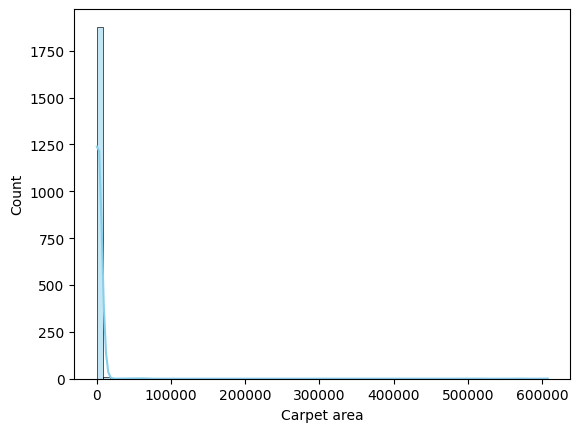

In [147]:
sns.histplot(df['Carpet area'],kde=True,bins=70,color='skyblue')

In [148]:
# boxplot
fig2 = px.box(df, df['Carpet area'])
fig2.show()

In [149]:
df[df['Carpet area']>500000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
109,flat,signature the roselia,sector 95,0.45,7.0,642857.142857,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,1,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,26.0
1290,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New Property,NaN,NaN,607936.0,1,0,0,0,1,0,37.0
1949,flat,signature global solera 2,sector 107,0.51,9.0,566666.666667,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,3,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,90.0


In [150]:
## outlier detection
df.loc[109,'Carpet area']=569.243
df.loc[1290,'Carpet area']=607.936
df.loc[1949,'Carpet area']=514.396

In [151]:
df[df['Carpet area']>18000]['Carpet area']

,Carpet area
78,58141.0
1288,45966.0
1291,54917.0
1292,64412.0
1293,34401.0
1414,48811.0
2303,64529.0
2398,18122.0


In [152]:
df.loc[78, 'Carpet area'] = 581.41
df.loc[1288, 'Carpet area'] = 459.66
df.loc[1291, 'Carpet area'] = 549.17
df.loc[1292, 'Carpet area'] = 644.12
df.loc[1293, 'Carpet area'] = 344.01
df.loc[1414, 'Carpet area'] = 488.11
df.loc[2303, 'Carpet area'] = 645.29
df.loc[2398, 'Carpet area'] = 181.22

In [153]:
df[df['Carpet area']>9000]

,Property_type,society,sector,price,Price_per_sqrt,Area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super_Built_up_area,Built_Up_area,Carpet area,Study Room,Servant Room,Store Room,Pooja Room,Others,furnish_type,luxury_score
1615,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.00,Carpet area: 10000 (929.03 sq.m.),4.0,4.0,3,9.0,South-East,Moderately Old,NaN,NaN,10000.0,0,1,0,0,0,1,31.0
1621,flat,m3m golfestate,sector 65,13.20,12000.0,11000.00,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,1,55.0
3162,house,Independent,sector 25,8.00,8000.0,10000.00,Carpet area: 10000 (929.03 sq.m.),3.0,9.0,1,3.0,NaN,New Property,NaN,NaN,10000.0,0,0,0,0,0,0,0.0
3549,house,Independent,sector 26,18.40,1859.0,98977.95,Plot area 502(419.74 sq.m.)Carpet area: 11000 sq.yards (9197.4 sq.m.),6.0,8.0,3,4.0,South,Relatively New Property,NaN,NaN,11000.0,0,1,1,1,0,2,113.0
3685,house,Independent,sector 26,18.25,18250.0,10000.00,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq.ft. (929.03 sq.m.),7.0,9.0,2,4.0,East,Relatively New Property,NaN,NaN,10000.0,1,1,1,1,0,1,28.0


In [154]:
## additinal room
plt.figure(figsize=(12,8))
for idx,room in enumerate(['Study Room','Servant Room','Store Room','Pooja Room','Others'],1):

  fig=px.pie(names=df[room].value_counts().index,values=df[room].value_counts().values,title=f'Distribution of {room}')
  fig.show()

<Figure size 1200x800 with 0 Axes>

In [155]:
##furnish_type
df['furnish_type'].value_counts()

,count
furnish_type,
1,2237
0,1362
2,104


In [156]:
px.pie(names=df['furnish_type'].value_counts().index,values=df['furnish_type'].value_counts().values)

In [157]:
px.bar(x=df['furnish_type'].value_counts().index,y=df['furnish_type'].value_counts().values,text_auto=True)

In [158]:
df['furnish_type'].isna().sum()

0

##`furnish_type`
- `60% of property are semi-furnished , 37% property are un-furnished and property are furnished .`

In [159]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'Price_per_sqrt', 'Area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'Super_Built_up_area', 'Built_Up_area', 'Carpet area',
       'Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others',
       'furnish_type', 'luxury_score'],
      dtype='object')

In [160]:
#'luxury_score'
df['luxury_score'].describe()

,luxury_score
count,3648.000000
mean,71.548246
std,52.962770
min,0.000000
25%,31.750000
50%,59.000000
75%,110.000000
max,174.000000


In [161]:
df['luxury_score'].value_counts()

,count
luxury_score,
0.0,457
49.0,344
174.0,196
44.0,62
165.0,55
38.0,55
72.0,53
60.0,47
37.0,46


<Axes: xlabel='luxury_score', ylabel='Count'>

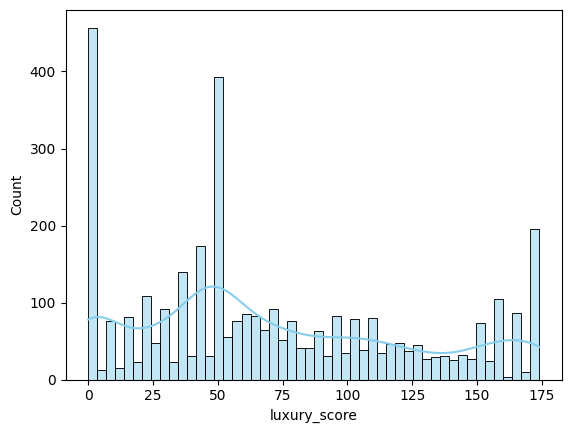

In [162]:
sns.histplot(df['luxury_score'],kde=True,bins=50,color='skyblue')

In [163]:
df[df['luxury_score']==174.000000]['price'].mean()

2.058316326530612

In [164]:
px.box(df,df['luxury_score'])

#`The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 150-174 range.`


# `The box plot reveals that the majority of the properties have luxury scores between approximately 31.5 and 110. The interquartile range (IQR) lies between these values.`

In [165]:
df.to_csv('gurgaon_property_data_after_eda',index=False)